In [1]:
import selenium
from selenium import webdriver
import time
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException

1. Scrape the details of most viewed videos on YouTube from Wikipedia.<br>
URL = https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos<br>
You need to find following details:<br>
A) Rank<br>
B) Name<br>
C) Artist<br>
D) Upload date<br>
E) Views

In [2]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_most-viewed_YouTube_videos'
driver.get(url)

In [4]:
table = driver.find_element(By.XPATH, './/table[@class="wikitable sortable jquery-tablesorter"]')

# Getting the rows of the table (excluding the header and footer row)
rows = table.find_elements(By.XPATH, './/tr')[1:-1]

# Scraping the details
details = []
for row in rows:
    cells = row.find_elements(By.XPATH, './/td')
    rank = cells[0].text.replace('.', '')
    name = cells[1].text.split('[')[0].replace('"', '')
    artist = cells[2].text
    upload_date = cells[4].text
    views = cells[3].text.replace(",", "")
    data = {
        'Rank': rank,
        'Name': name,
        'Artist': artist,
        'Upload date': upload_date,
        'Views (billions)': views
    }
    details.append(data)
    
driver.quit()

# Creating dataframe
df = pd.DataFrame(details)
df

,Rank,Name,Artist,Upload date,Views (billions)
0,1,Baby Shark Dance,Pinkfong Baby Shark - Kids' Songs & Stories,"June 17, 2016",12.85
1,2,Despacito,Luis Fonsi,"January 12, 2017",8.16
2,3,Johny Johny Yes Papa,LooLoo Kids,"October 8, 2016",6.70
3,4,Bath Song,Cocomelon – Nursery Rhymes,"May 2, 2018",6.20
4,5,Shape of You,Ed Sheeran,"January 30, 2017",6.00
5,6,See You Again,Wiz Khalifa,"April 6, 2015",5.89
6,7,Phonics Song with Two Words,ChuChu TV,"March 6, 2014",5.30
7,8,Wheels on the Bus,Cocomelon – Nursery Rhymes,"May 24, 2018",5.24
8,9,Uptown Funk,Mark Ronson,"November 19, 2014",4.92
9,10,Learning Colors – Colorful Eggs on a Farm,Miroshka TV,"February 27, 2018",4.89


2. Scrape the details team India’s international fixtures from bcci.tv.<br>
URL = https://www.bcci.tv/<br>
You need to find following details:<br>
A) Match title (i.e. 1st ODI)<br>
B) Series<br>
C) Place<br>
D) Date<br>
E) Time<br>
Note: - From bcci.tv home page you have reach to the international fixture page through code<br>

In [5]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [6]:
url = 'https://www.bcci.tv/'
driver.get(url)
time.sleep(3)

# Clicking the navigation button
driver.find_element(By.XPATH, '//button[@class="navbar-toggler menu-btn menu-icon"]').click()
time.sleep(1)

# Clicking INTERNATIONAL
driver.find_element(By.XPATH, '//a[@class="nav-link " and contains(., "INTERNATIONAL")]').click()
time.sleep(3)

# Accepting Cookies
driver.find_element(By.XPATH, '//button[@class="cookie__accept btn btn-primary"]').click()

# Clicking more fixtures
driver.find_element(By.XPATH,
            '//button[@class="match-btn btn-red d-flex align-items-center justify-content-center mx-auto mt-3"]').click()

# Getting all fixture details
match_cards = driver.find_elements(By.XPATH, '//div[@id="match-card"]')

match_details = []

for match in match_cards:
    series = match.find_element(By.XPATH, './/h5[@class="match-tournament-name ng-binding"]').text
    date = match.find_element(By.XPATH, './/div[@class="match-dates ng-binding"]').text
    match_time = match.find_element(By.XPATH, './/div[@class="match-time no-margin ng-binding"]').text
    match_title = match.find_element(By.XPATH, './/span[@class="matchOrderText ng-binding ng-scope"]').text.replace(' -', '')
    place = match.find_element(By.XPATH,
                        './/span[@class="ng-binding ng-scope"]').text + ' ' + match.find_element(By.XPATH, 
                                                                            './/span[@class="ng-binding"]').text
    
    data = {
        'Match Title': match_title,
        'Series': series,
        'Place': place,
        'Date': date,
        'Time': match_time
    }
    
    match_details.append(data)
    
driver.quit()

df = pd.DataFrame(match_details)
df

,Match Title,Series,Place,Date,Time
0,1st T20I,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur, Dhaka",9 JUL 2023,9:00 AM BST
1,2nd T20I,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur, Dhaka",11 JUL 2023,9:00 AM BST
2,1st Test,INDIA TOUR OF WEST INDIES 2023,"Windsor Park, Dominica",12 JUL 2023,3:00 PM BST
3,3rd T20I,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur, Dhaka",13 JUL 2023,9:00 AM BST
4,1st ODI,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur, Dhaka",16 JUL 2023,4:30 AM BST
5,2nd ODI,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur, Dhaka",19 JUL 2023,4:30 AM BST
6,2nd Test,INDIA TOUR OF WEST INDIES 2023,"Queen's Park Oval, Trinidad",20 JUL 2023,3:00 PM BST
7,3rd ODI,INDIA WOMEN TOUR OF BANGLADESH 2023,"Shere Bangla National Stadium, Mirpur, Dhaka",22 JUL 2023,4:30 AM BST
8,1st ODI,INDIA TOUR OF WEST INDIES 2023,"Kensington Oval, Barbados",27 JUL 2023,2:30 PM BST
9,2nd ODI,INDIA TOUR OF WEST INDIES 2023,"Kensington Oval, Barbados",29 JUL 2023,2:30 PM BST


3. Scrape the details of State-wise GDP of India from statisticstime.com.<br>
URL = http://statisticstimes.com/<br>
You have to find following details:<br>
A) Rank<br>
B) State<br>
C) GSDP(18-19)- at current prices<br>
D) GSDP(19-20)- at current prices<br>
E) Share(18-19)<br>
F) GDP($ billion)<br>
Note: - From statisticstimes home page you have to reach to economy page through code.

In [7]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [8]:
url = 'https://www.statisticstimes.com/'
driver.get(url)

time.sleep(3)

# Accepting cookies
driver.find_element(By.XPATH, '//a[@class="cc-btn cc-dismiss"]').click()


# Navigating to the desired page
economy_btn = driver.find_element(By.XPATH, '//button[@class="dropbtn" and contains(., "Economy")]')
hover = ActionChains(driver).move_to_element(economy_btn)
hover.perform()

driver.find_elements(By.XPATH, '//div[@class="dropdown-content"]/a[text()="India"]')[1].click()

time.sleep(1)

driver.back() # Could not find a way around popup ad

economy_btn = driver.find_element(By.XPATH, '//button[@class="dropbtn" and contains(., "Economy")]')
hover = ActionChains(driver).move_to_element(economy_btn)
hover.perform()

driver.find_elements(By.XPATH, '//div[@class="dropdown-content"]/a[text()="India"]')[1].click()

driver.find_element(By.XPATH, '//a[contains(text(), "GDP of Indian states")]').click()
time.sleep(1)

# Agreeing to privacy settings
driver.find_element(By.XPATH, '//button[@class="sc-ifAKCX ljEJIv"]').click()
time.sleep(1)

# Scraping the data
table = driver.find_element(By.ID, "table_id")
rows = table.find_elements(By.XPATH, ".//tr")[2:-1]

gdp_data = []

for row in rows:
    rank = row.find_element(By.XPATH, './/td[@class="data1"]').text
    state = row.find_element(By.XPATH, './/td[@class="name"]').text
    gdp_18_19 = row.find_elements(By.XPATH, './/td[@class="data"]')[0].text
    gdp_19_20 = row.find_element(By.XPATH, './/td[@class="data sorting_1"]').text
    share_18_19 = row.find_elements(By.XPATH, './/td[@class="data"]')[1].text
    gdp_billion = row.find_elements(By.XPATH, './/td[@class="data"]')[2].text
    
    data={
        'Rank': rank,
        'State': state,
        'GSDP(18-19) in Cr INR- at current prices': gdp_18_19,
        'GSDP(19-20)- in Cr INR at current prices': gdp_19_20,
        'Share(18-19)': share_18_19,
        'GDP($ billion)': gdp_billion
    }
    
    gdp_data.append(data)
    
driver.quit()

df = pd.DataFrame(gdp_data)
df

,Rank,State,GSDP(18-19) in Cr INR- at current prices,GSDP(19-20)- in Cr INR at current prices,Share(18-19),GDP($ billion)
0,1,Maharashtra,-,"2,632,792",13.94%,399.921
1,2,Tamil Nadu,"1,845,853","1,630,208",8.63%,247.629
2,3,Uttar Pradesh,"1,687,818","1,584,764",8.39%,240.726
3,4,Gujarat,-,"1,502,899",7.96%,228.290
4,5,Karnataka,"1,631,977","1,493,127",7.91%,226.806
5,6,West Bengal,"1,253,832","1,089,898",5.77%,165.556
6,7,Rajasthan,"1,020,989","942,586",4.99%,143.179
7,8,Andhra Pradesh,"972,782","862,957",4.57%,131.083
8,9,Telangana,"969,604","861,031",4.56%,130.791
9,10,Madhya Pradesh,"906,672","809,592",4.29%,122.977


4. Scrape the details of trending repositories on GitHub.com.<br>
URL = https://github.com/<br>
You have to find the following details:<br>
A) Repository title<br>
B) Repository description<br>
C) Contributors count<br>
D) Language used<br>
Note: - From the home page you have to click on the trending option from Explore menu through code.

In [9]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [10]:
url = 'https://github.com/'
driver.get(url)

driver.find_element(By.XPATH, 
            '//button[@class="js-details-target Button--link Button--medium Button d-lg-none color-fg-inherit p-1"]').click()
time.sleep(3)

driver.find_element(By.XPATH, '//button[contains(text(), "Open Source")]').click()
time.sleep(1)
driver.find_element(By.XPATH, '//a[contains(text(), "Trending")]').click()
time.sleep(3)

urls = []
repos = driver.find_elements(By.XPATH, '//h2[@class="h3 lh-condensed"]/a')
for r in repos:
    urls.append(r.get_attribute('href'))
    
repo_details = []

driver.maximize_window()

for url in urls:
    driver.get(url)
    time.sleep(1)
    title = driver.find_element(By.XPATH, '//strong[@class="mr-2 flex-self-stretch"]').text
    
    try:
        desc = driver.find_element(By.XPATH, '//p[@class="f4 my-3"]').text
    except NoSuchElementException:
        desc = '-'
    
    try:
        contributors = driver.find_element(By.XPATH,
                '//a[@class="Link--primary no-underline d-flex flex-items-center" and contains(., "Contributors")]/span').text
    except NoSuchElementException:
        contributors = '-'
        
    languages = driver.find_elements(By.XPATH, '//span[@class="color-fg-default text-bold mr-1"]')
    lang = ", ".join(l.text for l in languages)
    
    data = {
        'Repository title': title,
        'Repositiory description': desc,
        'Contributors count': contributors,
        'Language used': lang
    }
    
    repo_details.append(data)
    
    time.sleep(1)
    
driver.quit()

df = pd.DataFrame(repo_details)
df

,Repository title,Repositiory description,Contributors count,Language used
0,MobileSAM,This is the official code for Faster Segment A...,4,"Jupyter Notebook, Other"
1,mpt-30B-inference,Run inference on MPT-30B using CPU,-,Python
2,Block-Pornographic-Replies,屏蔽推特回复下的黄推。Block pornographic replies below th...,2,"JavaScript, CSS, HTML"
3,open-source-course,-,-,
4,PowerShell,PowerShell for every system!,435,"C#, PowerShell, Roff, Shell, Rich Text Format,..."
5,DragGAN,Official Code for DragGAN (SIGGRAPH 2023),14,"Python, Cuda, C++"
6,folly,An open-source C++ library developed and used ...,727,"C++, Python, CMake, C, Cython, Assembly, Other"
7,Tkinter-Designer,An easy and fast way to create a Python GUI 🐍,36,"Python, Makefile"
8,papers-we-love,Papers from the computer science community to ...,247,Shell
9,LLMs-In-China,中国大模型,-,


5. Scrape the details of top 100 songs on billboard.com.<br>
Url = https:/www.billboard.com/<br>
You have to find the following details:<br>
A) Song name<br>
B) Artist name<br>
C) Last week rank<br>
D) Peak rank<br>
E) Weeks on board<br>
Note: - From the home page you have to click on the charts option then hot 100-page link through code.

In [11]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [12]:
url = 'https://www.billboard.com/'
driver.get(url)
time.sleep(2)

# Rejecting cookies
driver.find_element(By.ID, "onetrust-reject-all-handler").click()
time.sleep(1)

# Navigating to the desired page
driver.find_elements(By.XPATH, '//button[contains(@class, "o-icon-button")]')[5].click()
time.sleep(2)

driver.find_element(By.XPATH, '//h3[@id="mega-menu-item-charts"]/a').click()
time.sleep(1)

driver.find_element(By.XPATH, '//a[contains(text(), "VIEW CHART")]').click()
time.sleep(2)

rows = driver.find_elements(By.XPATH, '//div[contains(@class, "o-chart-results-list-row-container")]')

song_charts = []

for row in rows:
    rank = row.find_element(By.XPATH, 
                './/span[@class="c-label  a-font-primary-bold-l u-font-size-32@tablet u-letter-spacing-0080@tablet"]').text
    name = row.find_element(By.XPATH, './/h3[contains(@class, "c-title  a-no-trucate a-font-primary-bold-s")]').text
    artist = row.find_element(By.XPATH, './/span[contains(@class, "c-label  a-no-trucate a-font-primary-s")]').text
    
    last_week = row.find_elements(By.XPATH, 
                            './/span[contains(@class, "c-label") and contains(@class, "a-font-primary")]')[-6].text
    peak = row.find_elements(By.XPATH, 
                            './/span[contains(@class, "c-label") and contains(@class, "a-font-primary")]')[-5].text
    weeks = row.find_elements(By.XPATH, 
                            './/span[contains(@class, "c-label") and contains(@class, "a-font-primary")]')[-4].text
    
    data = {
        'Song name': name,
        'Artist name': artist,
        'Last week rank': last_week,
        'Peak rank': peak,
        'Weeks on board': weeks
    }
    
    song_charts.append(data)
    
driver.quit()

df = pd.DataFrame(song_charts)
df

,Song name,Artist name,Last week rank,Peak rank,Weeks on board
0,Last Night,Morgan Wallen,1,1,21
1,Fast Car,Luke Combs,3,2,13
2,Calm Down,Rema & Selena Gomez,4,3,42
3,Flowers,Miley Cyrus,2,1,23
4,All My Life,Lil Durk Featuring J. Cole,5,2,6
...,...,...,...,...,...
95,"Angel, Pt. 1","Kodak Black, NLE Choppa, Jimin, JVKE & Muni Long",-,65,2
96,Girl In Mine,Parmalee,-,97,1
97,Moonlight,Kali Uchis,90,80,11
98,Classy 101,Feid x Young Miko,-,99,1


6. Scrape the details of Highest selling novels.<br>
URL = https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-grey-compare<br>
You have to find the following details:<br>
A) Book name<br>
B) Author name<br>
C) Volumes sold<br>
D) Publisher<br>
E) Genre

In [13]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [14]:
url = 'https://www.theguardian.com/news/datablog/2012/aug/09/best-selling-books-all-time-fifty-shades-grey-compare'
driver.get(url)
time.sleep(2)

table = driver.find_element(By.XPATH, '//table[@class="in-article sortable"]')

rows = table.find_elements(By.XPATH, './/tr')[2:]

book_details = []
for row in rows:
    columns = row.find_elements(By.XPATH, './/td')
    title = columns[1].text
    author = columns[2].text
    volumes = columns[3].text
    publisher = columns[4].text
    genre = columns[5].text
    
    data = {
        'Book name': title,
        'Author name': author,
        'Volumes sold': volumes,
        'Publisher': publisher,
        'Genre': genre
    }
    
    book_details.append(data)

driver.quit()

df = pd.DataFrame(book_details)
df

,Book name,Author name,Volumes sold,Publisher,Genre
0,"Da Vinci Code,The","Brown, Dan","5,094,805",Transworld,"Crime, Thriller & Adventure"
1,Harry Potter and the Deathly Hallows,"Rowling, J.K.","4,475,152",Bloomsbury,Children's Fiction
2,Harry Potter and the Philosopher's Stone,"Rowling, J.K.","4,200,654",Bloomsbury,Children's Fiction
3,Harry Potter and the Order of the Phoenix,"Rowling, J.K.","4,179,479",Bloomsbury,Children's Fiction
4,Fifty Shades of Grey,"James, E. L.","3,758,936",Random House,Romance & Sagas
...,...,...,...,...,...
95,"Ghost,The","Harris, Robert","807,311",Random House,General & Literary Fiction
96,Happy Days with the Naked Chef,"Oliver, Jamie","794,201",Penguin,Food & Drink: General
97,"Hunger Games,The:Hunger Games Trilogy","Collins, Suzanne","792,187",Scholastic Ltd.,Young Adult Fiction
98,"Lost Boy,The:A Foster Child's Search for the L...","Pelzer, Dave","791,507",Orion,Biography: General


7. Scrape the details most watched tv series of all time from imdb.com.<br>
URL = https://www.imdb.com/list/ls095964455/<br>
You have to find the following details:<br>
A) Name<br>
B) Year span<br>
C) Genre<br>
D) Run time<br>
E) Ratings<br>
F) Votes

In [15]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [16]:
url = 'https://www.imdb.com/list/ls095964455/'
driver.get(url)
time.sleep(2)

items = driver.find_elements(By.CLASS_NAME, "lister-item-content")

tv_series = []

for item in items:
    name = item.find_element(By.XPATH, './/h3[@class="lister-item-header"]/a').text
    years = item.find_element(By.XPATH, './/span[@class="lister-item-year text-muted unbold"]').text
    genre = item.find_element(By.CLASS_NAME, "genre").text
    runtime = item.find_element(By.CLASS_NAME, "runtime").text
    rating = item.find_element(By.CLASS_NAME, "ipl-rating-star__rating").text
    votes = item.find_element(By.NAME, "nv").text
    
    data = {
        'Name':name,
        'Year span': years,
        'Genre': genre,
        'Run time': runtime,
        'Rating': rating,
        'Votes': votes
    }
    
    tv_series.append(data)
    
driver.quit()

df = pd.DataFrame(tv_series)
df

,Name,Year span,Genre,Run time,Rating,Votes
0,Game of Thrones,(2011–2019),"Action, Adventure, Drama",57 min,9.2,"2,174,645"
1,Stranger Things,(2016–2024),"Drama, Fantasy, Horror",51 min,8.7,"1,252,369"
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",44 min,8.1,"1,032,911"
3,13 Reasons Why,(2017–2020),"Drama, Mystery, Thriller",60 min,7.5,"303,707"
4,The 100,(2014–2020),"Drama, Mystery, Sci-Fi",43 min,7.6,"262,849"
...,...,...,...,...,...,...
95,Reign,(2013–2017),Drama,42 min,7.4,"51,984"
96,A Series of Unfortunate Events,(2017–2019),"Adventure, Comedy, Drama",50 min,7.8,"64,015"
97,Criminal Minds,(2005– ),"Crime, Drama, Mystery",42 min,8.1,"208,616"
98,Scream: The TV Series,(2015–2019),"Comedy, Crime, Drama",45 min,7,"43,411"


8. Details of Datasets from UCI machine learning repositories.<br>
URL = https://archive.ics.uci.edu/<br>
You have to find the following details:<br>
A) Dataset name<br>
B) Data type<br>
C) Task<br>
D) Attribute type<br>
E) No of instances<br>
F) No of attribute<br>
G) Year<br>
Note: - from the home page you have to go to the Show All Dataset page through code.

In [17]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [18]:
url = 'https://archive.ics.uci.edu/'
driver.get(url)
time.sleep(2)

# View datasets
driver.find_element(By.XPATH, '//a[@class="btn-primary btn"]').click()
time.sleep(3)

driver.maximize_window()

# Accepting cookies
driver.find_element(By.XPATH, '//button[@class="btn-primary btn-sm btn m-1"]').click()
time.sleep(1)

driver.find_element(By.XPATH, '//div[@class="swap"]').click()

dataset_details = []

for page in range(63):
    
    dataset_items = driver.find_elements(By.XPATH, '//div[@class="rounded-box bg-base-100"]')

    for i in dataset_items:
        name = i.find_element(By.XPATH, './/a[@class="link-hover link text-xl font-semibold"]').text
        divs = i.find_elements(By.XPATH,
                               './/div[contains(@class, "col-span-3 flex items-center gap-2")]')
        type = divs[1].text
        task = divs[0].text
        
        instances = divs[2].text
        if instances != '':
            instances.split(' ')[0]
            
        attributes = divs[3].text
        if attributes != '':
            attributes.split(' ')[0]

        table = i.find_element(By.XPATH, './/table[@class="col-span-full my-2 table sm:col-start-2"]')
        row = table.find_elements(By.XPATH, './/tr')[1]
        attr_type = row.find_elements(By.XPATH, './/td')[1].text
        date = row.find_elements(By.XPATH, './/td')[2].text
        
        if date != 'N/A':
            year = date.split('/')[-1]
        else:
            year = date
        
        
        data = {
            'Dataset name': name,
            'Data type': type,
            'Task': task,
            'Attribute type': attr_type,
            'No of instances': instances,
            'No of attributes': attributes,
            'Year': year
        }
        
        dataset_details.append(data)
        
    # Next page
    try:
        driver.find_element(By.XPATH, '//button[@class="btn-primary btn-sm btn" and @aria-label="Next Page"]').click()
    except ElementClickInterceptedException:
        break
        
    time.sleep(2)

    
driver.quit()


df = pd.DataFrame(dataset_details)
df

,Dataset name,Data type,Task,Attribute type,No of instances,No of attributes,Year
0,Iris,Multivariate,Classification,Real,150 Instances,4 Attributes,1988
1,Heart Disease,Multivariate,Classification,"Categorical, Integer, Real",303 Instances,13 Attributes,1988
2,Adult,Multivariate,Classification,"Categorical, Integer",48.84K Instances,14 Attributes,1996
3,Dry Bean Dataset,Multivariate,Classification,"Integer, Real",13.61K Instances,17 Attributes,2020
4,Diabetes,,,"Categorical, Integer",,20 Attributes,N/A
...,...,...,...,...,...,...,...
618,PMU-UD,Univariate,Classification,,5.18K Instances,9 Attributes,2018
619,chestnut â€“ LARVIC,null,"Classification, Clustering",,1.45K Instances,3 Attributes,2017
620,EBL Domain Theories,,,N/A,,,N/A
621,Moral Reasoner,,,N/A,202 Instances,,1994


9. Scrape the details of Data science recruiters URL = https://www.naukri.com/hr-recruiters-consultants<br>
You have to find the following details:<br>
A) Name<br>
B) Designation<br>
C)Company<br>
D)Skills they hire for<br>
E) Location<br>

In [19]:
# Setting up the WebDriver
service = Service(r"chromedriver.exe")
driver = webdriver.Chrome(service=service)

In [20]:
url = 'https://www.naukri.com/hr-jobs' # This page opens on my browser when i use the link given above
driver.get(url)
time.sleep(2)

jobs_list = driver.find_elements(By.CLASS_NAME, "jobTuple")

job_details = []
for j in jobs_list:
    name = j.find_element(By.XPATH, './/a[@class="title ellipsis"]').text
    company = j.find_element(By.XPATH, './/a[@class="subTitle ellipsis fleft"]').text
    skills = j.find_element(By.XPATH, './/ul[@class="tags has-description"]').text.replace('\n', ', ')
    location = j.find_element(By.XPATH, './/span[contains(@class, "ellipsis fleft locWdth")]').text
    
    data = {
        'Designation': name,
        'Company': company,
        'Skills they hire for': skills,
        'Location': location
    }
    job_details.append(data)
    
# # Next page button
# driver.find_element(By.XPATH, '//a[@class="fright fs14 btn-secondary br2"]').click()
    
driver.quit()

df = pd.DataFrame(job_details)
df

,Designation,Company,Skills they hire for,Location
0,Recruitment Opportunity For HR Executive,Kone,"HR Coordination, hr generalist activities, Pay...","Chennai, Tamil Nadu"
1,Human Resources Executive,Marriott,"Resource, Training, Management, Hrsd, Complian...",Chennai
2,HR Recruiter _ Bhubaneshwar (Btech Candidates ...,Tech Mahindra,"Engineering, Hrsd, US IT recruitment, Recruitm...",Bhubaneswar
3,Job opportunity For freshers/HR Recruiter/HR E...,Black And White Business Solutions,"Communication Skills, Bulk Hiring, Management ...",Bangalore/Bengaluru(Kodihalli +3)
4,HR Executive,Definedge Solutions,"Training, Recruitment, Development, Hrsd, Trai...",Pune
5,HR Executive,Bonami Software,"hr, Talent Management, HR Generalist Activitie...","New Delhi, Delhi / NCR"
6,Direct Walk in Interview For HR Executive(Female),m2 Vending,"HR Generalist Activities, Joining formalities,...","Gurgaon/ Gurugram, Haryana"
7,HR Executive,Reputed Group of Higher Education Insititions....,"Human Resource Management, HR, HR Operations, ...",Bangalore/Bengaluru(Bannerghatta +1)
8,Jr HR Executive,SPECTRAFORCE,"background verification, Attendance Maintenanc...","Hybrid - Mohali, Punjab"
9,Executive/ Assistant Manager HR Generalist - P...,OASIS,"hr generalist activities, HR Information Syste...","Pune, Maharashtra(Koregaon Park)"


Access Denied - when I try to click on Next page button as I live outside of India

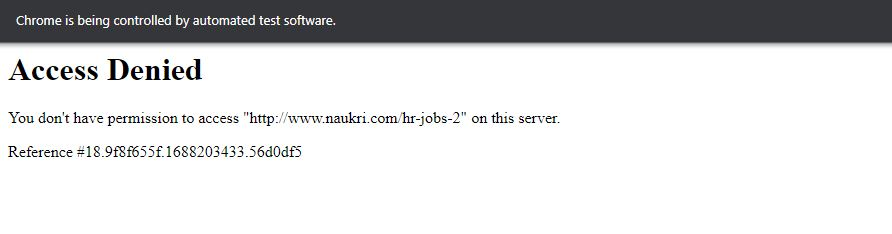